# Исследование рынка общепита в Москве для принятия решения об открытии нового заведения

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

### Цели исследования
1. Подготовить исследование рынка Москвы.
2. Найти интересные особенности.
3. Презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

### Описание данных
Файл `moscow_places.csv`:
- `name` — название заведения;
- `address` — адрес заведения;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `lat` — широта географической точки, в которой находится заведение;
- `lng` — долгота географической точки, в которой находится заведение;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
  - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с - подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым
  - 1 — заведение является сетевым
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `seats` — количество посадочных мест.

### Ход исследования
Данные получу из файла `/datasets/moscow_places.csv`. О качестве данных ничего неизвестно, поэтому перед тем как приступить к ходу исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Потом создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, исследование пройдёт в пять этапов:
1. Загрузка данных и изучение общей информации
2. Предобработка данных
3. Анализ данных
4. Детализация исследования
6. Общий вывод

## 1. Загрузка данных и изучение общей информации

Импорт библиотек и загрузка файла.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import plotly.express as px
from plotly import graph_objects as go

from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
try:
    data = pd.read_csv('/datasets/moscow_places.csv')
except:
    data = pd.read_csv('C:/Users/salpa/Downloads/moscow_places.csv')

Обзор файла.

In [3]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,5.00,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.48,4.50,выше среднего,Средний счёт:1500–1600 ₽,1550.00,NaN,0,4.00
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.89,37.53,4.60,средние,Средний счёт:от 1000 ₽,1000.00,NaN,0,45.00
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.88,37.49,5.00,NaN,Цена чашки капучино:155–185 ₽,NaN,170.00,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.45,5.00,средние,Средний счёт:400–600 ₽,500.00,NaN,1,148.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [5]:
data.describe()

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.00,8406.00,8406.00,3149.00,535.00,8406.00,4795.00
mean,55.75,37.61,4.23,958.05,174.72,0.38,108.42
std,0.07,0.10,0.47,1009.73,88.95,0.49,122.83
min,55.57,37.36,1.00,0.00,60.00,0.00,0.00
25%,55.71,37.54,4.10,375.00,124.50,0.00,40.00
50%,55.75,37.61,4.30,750.00,169.00,0.00,75.00
75%,55.80,37.66,4.40,1250.00,225.00,1.00,140.00
max,55.93,37.87,5.00,35000.00,1568.00,1.00,1288.00


Приведём названия заведений и их адреса к нижнему регистру.

In [6]:
data['name'] = data['name'].str.lower()
data['address'] = data['address'].str.lower()

In [7]:
print('Количество заведений:', data['name'].nunique())

Количество заведений: 5512


- Мы загрузили данные и провели первичный осмотр. В файле 14 столбцов и 8406 строк. Есть пропуски и аномалии.
- В датабазе представлено 5512 заведений.

## 2.  Предобработка данных

In [8]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

- Есть пропуски в шести столбцах. Больше всего в `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` и `seats`. Удалять их точно нельзя, дальше посмотрим что мы сможем с ними сделать.

In [9]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


- Явных дубликатов не обнаружено.

Теперь посмотрим дубликаты неявные.

In [10]:
data[data.duplicated(['name', 'address'])]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.88,37.53,3.20,NaN,NaN,NaN,NaN,0,NaN
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.81,37.50,4.20,NaN,NaN,NaN,NaN,1,188.00
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.81,37.64,4.40,NaN,NaN,NaN,NaN,1,150.00
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.74,37.41,4.10,NaN,NaN,NaN,NaN,0,276.00


In [11]:
data = data.drop_duplicates(subset=['name', 'address'])

In [12]:
data[data.duplicated(['name', 'address'])]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


- Обнаружено и удалено четыре неявных дубликата.

Посмотрим на ранее обнаруженную аномалию в 1288 посадочных мест внимательней.

In [13]:
data['seats'].describe()

count   4792.00
mean     108.36
std      122.84
min        0.00
25%       40.00
50%       75.00
75%      140.00
max     1288.00
Name: seats, dtype: float64

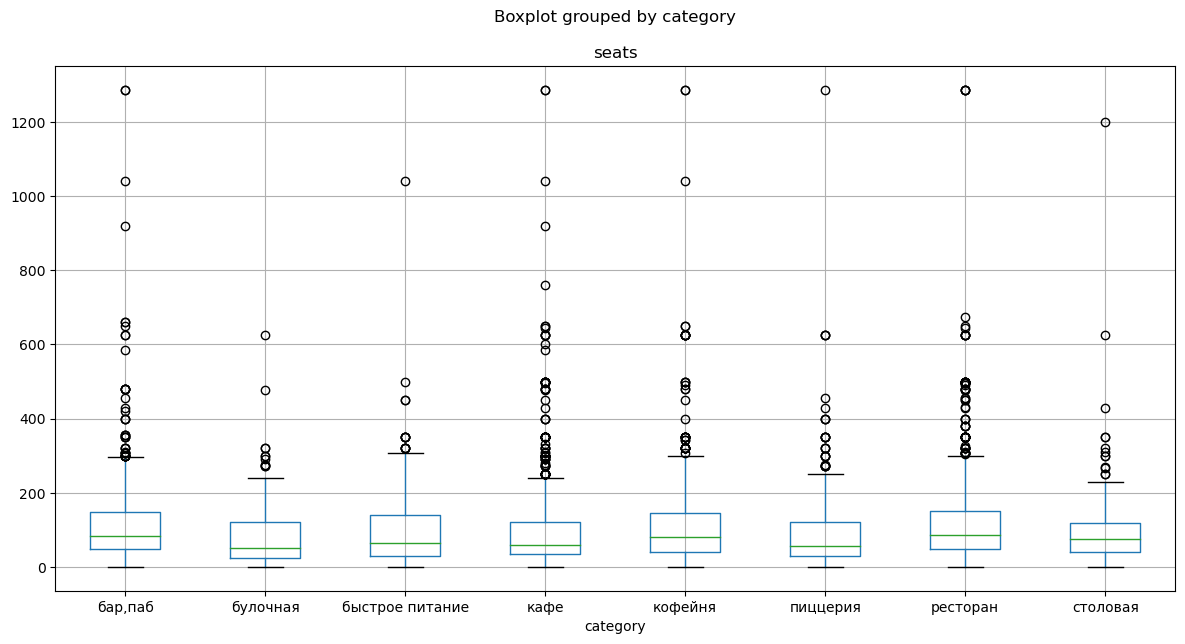

In [14]:
data.boxplot(column='seats', by='category', figsize=(14, 7))
plt.show()

Очевидны выбросы, похоже на ошибки в заполнении данных. Посчитаем сколько заведений с больше чем 500 посадочных мест.

In [15]:
print('Заведений с посадкой больше 500:', data[data['seats'] > 500]['name'].count())

Заведений с посадкой больше 500: 56


Это буквально 1% от всех заведений, поэтому их можно удалить.

In [16]:
seats500 = data[data['seats'] > 500]
data = data.query('index not in @seats500.index')
print('Заведений с посадкой больше 500:', data[data['seats'] > 500]['name'].count())

Заведений с посадкой больше 500: 0


Создадим столбец `street` с названиями улиц из столбца с адресом и столбец `is_24/7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7).

In [17]:
data['street'] = data['address'].str.split(', ').str[1]

In [18]:
data['is_24/7'] = data['hours'].str.contains('ежедневно, круглосуточно')
data.sample(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
647,i-chef бистро,кафе,"москва, смольная улица, 24а",Северный административный округ,"ежедневно, 08:00–18:30",55.86,37.48,4.50,NaN,NaN,NaN,NaN,0,40.00,смольная улица,False
4766,грабли,ресторан,"москва, центральный административный округ, тв...",Центральный административный округ,"ежедневно, 10:00–22:00",55.76,37.63,4.30,NaN,NaN,NaN,NaN,1,NaN,центральный административный округ,False
5149,хочу хычин,ресторан,"москва, стремянный переулок, 38",Центральный административный округ,"ежедневно, 10:00–22:00",55.73,37.63,4.60,средние,Средний счёт:от 400 ₽,400.00,NaN,0,94.00,стремянный переулок,False
6693,asia gourmet,кафе,"москва, проспект вернадского, 86в",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",55.66,37.48,4.00,средние,Средний счёт:100–599 ₽,349.00,NaN,1,NaN,проспект вернадского,False
5035,гао,ресторан,"москва, летниковская улица, 4, стр. 5",Центральный административный округ,"ежедневно, 11:30–22:00",55.73,37.64,4.30,средние,Средний счёт:150–700 ₽,425.00,NaN,0,45.00,летниковская улица,False


- Мы посчитали пропуски, проверили дубликаты, убрали аномалии и создали новые столбцы, которые нам будут нужны для дальнейшего анализа.

## 3.  Анализ данных

Какие категории заведений представлены в данных? Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации.

In [19]:
category = data.groupby('category')['name'].count().sort_values(ascending=False).reset_index()
category.columns = ['категория', 'количество']
category

,категория,количество
0,кафе,2362
1,ресторан,2030
2,кофейня,1401
3,"бар,паб",754
4,пиццерия,629
5,быстрое питание,602
6,столовая,313
7,булочная,255


In [ ]:
fig = px.pie(category, 
             values='количество', 
             names='категория', 
             title='Категории объектов общественного питания', 
             color_discrete_sequence=px.colors.diverging.Portland)
fig.show()

<image src="https://i.pstorage.space/i/7m5abYkQ/original_1.PNG" alt="">

- Больше половины всех заведений составляют кафе и рестораны. Третьими идут кофейни.
- Самые непопулярные заведения - столовые и булочные.

Исследуем количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построим визуализации.

In [20]:
data.groupby('category')['seats'].describe().round(2).reset_index()

,category,count,mean,std,min,25%,50%,75%,max
0,"бар,паб",457.00,108.95,93.28,0.00,47.00,80.00,140.00,480.00
1,булочная,147.00,85.74,87.35,0.00,25.00,50.00,120.00,478.00
2,быстрое питание,348.00,96.19,94.02,0.00,27.25,65.00,136.25,500.00
3,кафе,1203.00,89.42,88.81,0.00,35.00,60.00,105.50,500.00
4,кофейня,739.00,100.43,90.99,0.00,40.00,78.00,140.00,500.00
5,пиццерия,423.00,87.91,85.48,0.00,30.00,52.00,120.00,455.00
6,ресторан,1257.00,114.90,96.96,0.00,48.00,86.00,150.00,500.00
7,столовая,162.00,89.72,77.27,0.00,40.00,75.00,115.00,428.00


In [21]:
seats_median = data[data['seats'] != 0].groupby('category')['seats'].median().reset_index().sort_values(by='seats', ascending=False).round(2)

In [ ]:
fig = px.bar(seats_median,
             x='category',
             y='seats',
             hover_data=['seats', 'category'],
             color='seats',
             color_discrete_sequence=px.colors.diverging.Portland,
             labels={'pop':'Медианное количество посадочных мест в заведениях'},
             height=500,
             width=900)

fig.update_layout(title='Медианное количество посадочных мест в заведениях',
                   xaxis_title='Категория объекта',
                   yaxis_title='Количество мест')
fig.show()

<image src="https://i.pstorage.space/i/pLpv4RXlK/original_2.PNG" alt="">

- Больше всего посадочных мест в ресторанах. Второе место - бары, пабы. Третье - кофейни.

Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [22]:
chain = data.groupby('chain')['name'].count().sort_values(ascending=False).reset_index()
chain.columns = ['chain', 'count']
chain = chain.replace([0, 1],['несетевые', 'сетевые'])
chain

,chain,count
0,несетевые,5169
1,сетевые,3177


In [ ]:
fig = px.pie(chain,
             labels=['несетевые', 'сетевые'], 
             values='count',
             names='chain',
             title='Соотношение сетевых и несетевых заведений', 
             color_discrete_sequence=px.colors.diverging.Portland)
fig.show()

<image src="https://i.pstorage.space/i/m1Qg3lPO7/original_3.PNG" alt="">

- Сетевых заведений 38%, несетевых - 62%.

Какие категории заведений чаще являются сетевыми? Исследуем данные и ответим на вопрос графиком.

In [23]:
chains = data.groupby(by=['category', 'chain'], as_index=False).agg(count=('name', 'count'))
chains.loc[chains['chain'] == 0, 'chain'] = 'несетевые'
chains.loc[chains['chain'] == 1, 'chain'] = 'сетевые'
chains = chains.sort_values(by='count', ascending=True).reset_index(drop=True)

In [ ]:
fig = px.bar(chains,
             x='count',
             y='category',
             text= 'count',
             color='chain',
             color_discrete_sequence=px.colors.diverging.Portland,
             height=500,
             width=900
             )
fig.update_layout(title = 'Соотношение сетевых и несетевых заведений',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Категории')
fig.show()

<image src="https://i.pstorage.space/i/8yR0PXA7l/original_4.PNG" alt="">

- Сетевыми чаще бывают пиццерии, кофейни и булочные.
- Очень малая доля сетевых столовых и баров, пабов.

Сгруппируем данные по названиям заведений и найдём топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Построим подходящую для такой информации визуализацию.

In [24]:
data_chain = data[data['chain'] == 1]
names = data_chain.pivot_table(index='name', values='category', aggfunc='count').reset_index()
names.columns = ['name', 'count']
names = names.sort_values(by='count', ascending=False).reset_index(drop=True).head(15)

name_category = data[['name','category']]
names = names.merge(name_category.drop_duplicates('name'),how='left', on='name')
names

,name,count,category
0,шоколадница,118,кофейня
1,домино'с пицца,76,пиццерия
2,додо пицца,74,пиццерия
3,one price coffee,70,кофейня
4,яндекс лавка,68,ресторан
5,cofix,65,кофейня
6,prime,50,ресторан
7,хинкальная,44,быстрое питание
8,кофепорт,42,кофейня
9,теремок,38,ресторан


In [25]:
names['category'].value_counts()

кофейня            5
ресторан           3
кафе               3
пиццерия           2
быстрое питание    1
булочная           1
Name: category, dtype: int64

In [ ]:
fig = px.bar(names,
             x='count',
             y='name',
             text='count',
             color='name',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900
             )
fig.update_layout(title = 'Топ-15 популярных сетей',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Названия заведений',
                  showlegend = False)
fig.show()

<image src="https://i.pstorage.space/i/wRae6VoP8/original_5.PNG" alt="">

- Самая популярная сеть с большим отрывом - Шоколадница.
- Следом за ней идут Домино'с Пицца, Додо Пицца, One Price Coffee и Яндекс Лавка.
- Треть из представленных в топе заведений - кофейни.

Какие административные районы Москвы присутствуют в датасете? Отобразим общее количество заведений и количество заведений каждой категории по районам.

In [26]:
district = data.groupby('district')['name'].count().sort_values(ascending=False).reset_index()
district.columns = ['район', 'количество']
district

,район,количество
0,Центральный административный округ,2242
1,Южный административный округ,891
2,Северо-Восточный административный округ,890
3,Северный административный округ,875
4,Западный административный округ,830
5,Восточный административный округ,789
6,Юго-Восточный административный округ,714
7,Юго-Западный административный округ,706
8,Северо-Западный административный округ,409


In [ ]:
fig = px.bar(district,
             x='количество',
             y='район',
             text='количество',
             color='район',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900
             )
fig.update_layout(title = 'Количество заведений по административным районам',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Административный район',
                  showlegend = False)
fig.show()

<image src="https://i.pstorage.space/i/7p5gPX7Xm/original_6.PNG" alt="">

In [27]:
district2 = data.groupby(['district', 'category']).agg({'address' : 'count'}).reset_index()
district2.columns = ['район', 'категория', 'количество']
district2.head()

,район,категория,количество
0,Восточный административный округ,"бар,паб",49
1,Восточный административный округ,булочная,25
2,Восточный административный округ,быстрое питание,70
3,Восточный административный округ,кафе,269
4,Восточный административный округ,кофейня,104


In [ ]:
fig = px.bar(district2,
             x='количество',
             y='район',          
             color='категория',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900,
            )
fig.update_layout(title='Количество заведений каждой категории по районам',
                   xaxis_title='Количество заведений',
                   yaxis_title='Административный район',
                   yaxis={'categoryorder':'total ascending'},
                 )
fig.show()

<image src="https://i.pstorage.space/i/lvxozK6pd/original_7.PNG" alt="">

- В ЦАО ожидаемо больше всего заведений - 2242 шт., это больше чем в два раза превосходит любой другой район.
- Рестораны, кафе и кофейни преобладают везде, а в ЦАО ещё и бары с пабами.

Визуализируем распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [28]:
rating = data.groupby('category')['rating'].mean().round(2).sort_values(ascending=False).reset_index()
rating.columns = ['категория', 'средний рейтинг']
rating

,категория,средний рейтинг
0,"бар,паб",4.39
1,пиццерия,4.30
2,ресторан,4.29
3,кофейня,4.28
4,булочная,4.27
5,столовая,4.21
6,кафе,4.12
7,быстрое питание,4.05


In [ ]:
fig = px.bar(rating,
             x='средний рейтинг',
             y='категория',
             text='средний рейтинг',
             color='категория',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900
             )
fig.update_layout(title = 'Средний рейтинг заведений по категориям',
                  xaxis_title = 'Средний рейтинг',
                  yaxis_title = 'Категория заведения',
                  showlegend = False)
fig.update_xaxes(range=[4, 4.4])
fig.show()

<image src="https://i.pstorage.space/i/7m5abYlO/original_8.PNG" alt="">

In [29]:
rating_dist = data.groupby('district')['rating'].mean().round(2).sort_values(ascending=False).reset_index()
rating_dist.columns = ['район', 'средний рейтинг']
rating_dist

,район,средний рейтинг
0,Центральный административный округ,4.38
1,Северный административный округ,4.24
2,Северо-Западный административный округ,4.21
3,Западный административный округ,4.18
4,Южный административный округ,4.18
5,Восточный административный округ,4.17
6,Юго-Западный административный округ,4.17
7,Северо-Восточный административный округ,4.15
8,Юго-Восточный административный округ,4.10


In [ ]:
fig = px.bar(rating_dist,
             x='средний рейтинг',
             y='район',
             text='средний рейтинг',
             color='район',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900
             )
fig.update_layout(title = 'Средний рейтинг заведений по районам',
                  xaxis_title = 'Средний рейтинг',
                  yaxis_title = 'Административный район',
                  showlegend = False)
fig.update_xaxes(range=[4, 4.4])
fig.show()

<image src="https://i.pstorage.space/i/DegLPWRYW/original_9.PNG" alt="">

Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.

In [ ]:
# подключаем модуль для работы с JSON-форматом
import json

#state_geo = '/datasets/admin_level_geomap.geojson'

# загружаем JSON-файл с границами округов Москвы
try:
     state_geo = 'C:/Users/salpa/Downloads/admin_level_geomap.geojson'
except:
     state_geo = '/datasets/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
map_rating = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_dist,
    columns=['район', 'средний рейтинг'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(map_rating)

# выводим карту
map_rating

<image src="https://i.pstorage.space/i/pLpv4RqeM/original_10.PNG" alt="">

- Самый большой средний рейтинг - у баров, пабов, самый низкий - у заведений быстрого питания.
- В ЦАО заведения оценены лучше чем в остальных районах. В ЮВАО наоборот - хуже всех.
- Средний рейтинг находится в диапазоне от 4 до 4,4 баллов.

Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки `folium`.

In [ ]:
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(map_rating)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
data.apply(create_clusters, axis=1)

# выводим карту
map_rating

<image src="https://i.pstorage.space/i/NZYAP2y44/original_11.PNG" alt="">

- Рейтинг зависит от многих параметров, в том числе и от района.

Найдём топ-15 улиц по количеству заведений. Построим график распределения количества заведений и их категорий по этим улицам.

In [30]:
streets = data.pivot_table(index='street', values='name', aggfunc='count').reset_index()
streets.columns = ['улица', 'количество']
streets = streets.sort_values(by='количество', ascending=False).reset_index(drop=True).head(15)
streets

,улица,количество
0,проспект мира,183
1,профсоюзная улица,122
2,ленинский проспект,107
3,проспект вернадского,97
4,дмитровское шоссе,88
5,каширское шоссе,77
6,варшавское шоссе,76
7,ленинградский проспект,72
8,ленинградское шоссе,70
9,мкад,65


In [ ]:
fig = px.bar(streets,
             x='количество',
             y='улица',
             text='количество',
             color='улица',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900
             )
fig.update_layout(title = 'Топ-15 улиц по количеству заведений',
                  xaxis_title = 'Количество заведений',
                  yaxis_title = 'Название улицы',
                  showlegend = False)
fig.show()

<image src="https://i.pstorage.space/i/PAYLv8qb3/original_12.PNG" alt="">

In [31]:
streets2 = data.groupby(['street', 'category']).agg({'name' : 'count'}).reset_index()
streets2.columns = ['улица', 'категория', 'количество']

streets_top15 = streets2[streets2['улица'].isin(streets['улица'])]
streets_top15.sort_values(by='количество', ascending=False).reset_index(drop=True)

,улица,категория,количество
0,проспект мира,кафе,53
1,проспект мира,ресторан,45
2,мкад,кафе,45
3,проспект мира,кофейня,36
4,профсоюзная улица,кафе,35
...,...,...,...
106,кутузовский проспект,булочная,1
107,проспект вернадского,булочная,1
108,мкад,столовая,1
109,люблинская улица,пиццерия,1


In [ ]:
fig = px.bar(streets_top15,
             x='количество',
             y='улица',          
             color='категория',
             color_discrete_sequence=px.colors.sequential.Plasma,
             height=500,
             width=900,
            )
fig.update_layout(title='Количество заведений каждой категории по топ-15 улицам',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название улицы',
                   yaxis={'categoryorder':'total ascending'},
                 )
fig.show()

<image src="https://i.pstorage.space/i/0by4PXapd/original_13.PNG" alt="">

- Больше всего заведений расположено на длинных артериальных улицах, которые берут начало от Садового кольца и идут как правило до самого МКАДа: Проспект Мира, Профсоюзная, Ленинский проспект, Проспект Вернадского, Дмитровское шоссе.
- На них больше всего заведений типа ресторан, кафе и кофейня.

Найдём улицы, на которых находится только один объект общепита.

In [32]:
street_one = data.pivot_table(index='street', values='name', aggfunc='count').reset_index()
street_one.columns = ['street', 'count']
street_one = street_one.query('count == 1').reset_index(drop=True)

street_category = data[['street','category']]
street_one = street_one.merge(street_category.drop_duplicates('street'),how='left', on='street')
street_one

,street,count,category
0,1-й автозаводский проезд,1,кафе
1,1-й балтийский переулок,1,ресторан
2,1-й варшавский проезд,1,кафе
3,1-й вешняковский проезд,1,кафе
4,1-й голутвинский переулок,1,"бар,паб"
...,...,...,...
452,электрический переулок,1,столовая
453,юго-западный административный округ,1,кафе
454,якиманский переулок,1,кафе
455,яковоапостольский переулок,1,кофейня


In [33]:
street_one['category'].value_counts()

кафе               159
ресторан            93
кофейня             84
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: category, dtype: int64

- На 457 улицах расположено только одно заведение.
- Чаще всего это кафе, далее идут рестораны и кофейни. Остальных категорий гораздо меньше.
- Скорее всего это улицы/переулки, на которых физически может разместиться только один объект.

Значения средних чеков заведений хранятся в столбце `middle_avg_bill`. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитаем медиану этого столбца для каждого района. Используем это значение в качестве ценового индикатора района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района.

In [34]:
median_bill_dist = data.groupby('district')['middle_avg_bill'].median().sort_values(ascending=False).reset_index()
median_bill_dist.columns = ['район', 'средний чек']
median_bill_dist

,район,средний чек
0,Западный административный округ,1000.00
1,Центральный административный округ,1000.00
2,Северо-Западный административный округ,700.00
3,Северный административный округ,650.00
4,Юго-Западный административный округ,600.00
5,Восточный административный округ,550.00
6,Северо-Восточный административный округ,500.00
7,Южный административный округ,500.00
8,Юго-Восточный административный округ,450.00


In [ ]:
# создаём карту Москвы
map_price = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=median_bill_dist,
    columns=['район', 'средний чек'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный средний чек заведений по районам',
).add_to(map_price)

# выводим карту
map_price

<image src="https://i.pstorage.space/i/ZqNv571q6/original_14.PNG" alt="">

- Самые большие чеки у заведений в ЦАО и ЗАО (1000р.). Центр понятно, а вот запад сперва может удивить, но нужно понимать, что в ЗАО входят такие совсем не бюджетные локации как Москва-Сити и аэропорт Внуково.
- Дешевле всего в ЮВАО, ЮАО и СВАО.

Исследуем количество круглосуточных заведений.

In [35]:
allnight = data[data['is_24/7'] == True]

allnight_dist = allnight.groupby('district')['name'].count().sort_values(ascending=False).reset_index()
allnight_dist.columns = ['район', 'количество']
allnight_dist

,район,количество
0,Центральный административный округ,131
1,Восточный административный округ,97
2,Юго-Восточный административный округ,93
3,Северо-Восточный административный округ,75
4,Южный административный округ,75
5,Юго-Западный административный округ,73
6,Западный административный округ,70
7,Северный административный округ,70
8,Северо-Западный административный округ,43


In [ ]:
# создаём карту Москвы
map_24h = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=allnight_dist,
    columns=['район', 'количество'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество круглосуточных заведений по районам',
).add_to(map_24h)

# выводим карту
map_24h

<image src="https://i.pstorage.space/i/bog3Vwa6q/original_15.PNG" alt="">

**Общий вывод:**
<br/>
- Больше всего заведений в категориях кафе, рестораны и кофейни.
- По количеству посадочных мест лидируют рестораны. Затем идут бары, пабы и кофейни.
- Сетевых заведений в исследовании 38%, несетевых - 62%.
- Сетевыми чаще бывают пиццерии, кофейни и булочные.
- Топ-3 самых популярных сетей: Шоколадница, Домино'с Пицца, Додо Пицца.
- Больше всего заведений в ЦАО (в два раза больше любого другого района), в нём в отличие от других районов доминируют рестораны.
- Бары, пабы как правило получают самые высокие средние оценки, заведения быстрого питания - самые низкие.
- Лучший средний рейтинг у заведений в ЦАО, худший - в ЮВАО.
- Больше всего заведений располагаются на самых протяжённых улицах - Проспект Мира, Профсоюзная, Ленинский проспект.
- Самый высокий средний чек забирают ЦАО и ЗАО. Самый низкий - ЮВАО.
- Круглосуточных заведений больше всего в ЦАО, меньше - в СЗАО.

## 4. Детализация исследования

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробуйте определить, осуществима ли мечта клиентов.

Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [36]:
coffeehouses = data.query("category.isin(['кофейня'])")
print('Всего кофеен:', len(coffeehouses))

Всего кофеен: 1401


In [37]:
coffeehouses_dist = coffeehouses.groupby('district')['name'].count().sort_values(ascending=False).reset_index()
coffeehouses_dist.columns = ['район', 'количество']
coffeehouses_dist

,район,количество
0,Центральный административный округ,428
1,Северный административный округ,186
2,Северо-Восточный административный округ,159
3,Западный административный округ,146
4,Южный административный округ,131
5,Восточный административный округ,104
6,Юго-Западный административный округ,96
7,Юго-Восточный административный округ,89
8,Северо-Западный административный округ,62


In [ ]:
# создаём карту Москвы
map_coffeehouses = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffeehouses_dist,
    columns=['район', 'количество'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество кофеен по районам',
).add_to(map_coffeehouses)

# выводим карту
map_coffeehouses

<image src="https://i.pstorage.space/i/ab0K82l0b/original_16.PNG" alt="">

In [ ]:
# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(map_coffeehouses)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coffeehouses.apply(create_clusters, axis=1)

# выводим карту
map_coffeehouses

<image src="https://i.pstorage.space/i/vel7W8qvb/original_17.PNG" alt="">

- Всего в датасете 1401 кофейня.
- В ЦАО их больше чем в любом другом районе - 428, следом САО (186) и СВАО (159).
- В ЮЗАО, ЮВАО и СЗАО их количество самое низкое и не достигает даже 100 штук на район.

Есть ли круглосуточные кофейни?

In [38]:
coffeehouses_24h = coffeehouses[coffeehouses['is_24/7'] == True]
print('Всего круглосуточных кофеен:', len(coffeehouses_24h))

Всего круглосуточных кофеен: 59


In [39]:
coffee_24h_dist = coffeehouses_24h.groupby('district')['name'].count().sort_values(ascending=False).reset_index()
coffee_24h_dist.columns = ['район', 'количество']
coffee_24h_dist

,район,количество
0,Центральный административный округ,26
1,Западный административный округ,9
2,Юго-Западный административный округ,7
3,Восточный административный округ,5
4,Северный административный округ,5
5,Северо-Восточный административный округ,3
6,Северо-Западный административный округ,2
7,Юго-Восточный административный округ,1
8,Южный административный округ,1


In [ ]:
# создаём карту Москвы
map_coffee_24h = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_24h_dist,
    columns=['район', 'количество'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Количество круглосуточных кофеен по районам',
).add_to(map_coffee_24h)

# выводим карту
map_coffee_24h

<image src="https://i.pstorage.space/i/vel7W8qg5/original_18.PNG" alt="">

- Круглосуточных кофеен всего 4% от общего количества.
- Почти половина из них находится в ЦАО.

Какие у кофеен рейтинги? Как они распределяются по районам?

In [40]:
rating_coffee = coffeehouses.groupby('district')['rating'].mean().round(2).sort_values(ascending=False).reset_index()
rating_coffee.columns = ['район', 'средний рейтинг']
rating_coffee

,район,средний рейтинг
0,Центральный административный округ,4.34
1,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
3,Восточный административный округ,4.28
4,Юго-Западный административный округ,4.28
5,Юго-Восточный административный округ,4.23
6,Южный административный округ,4.23
7,Северо-Восточный административный округ,4.22
8,Западный административный округ,4.19


In [ ]:
# создаём карту Москвы
map_coffee_rating = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_coffee,
    columns=['район', 'средний рейтинг'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг кофеен по районам',
).add_to(map_coffee_rating)

# выводим карту
map_coffee_rating

<image src="https://i.pstorage.space/i/qYy1vb0ll/original_19.PNG" alt="">

- Самые лучшие кофейни по средним оценкам - в ЦАО и СЗАО, больше 4,3.
- Район с худшими кофейнями - ЗАО (4,19).
- Но, в целом, разброс оценок не такой уж и большой: 4,19 - 4,34.

На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

In [41]:
coffeehouses_cup = coffeehouses.groupby('district')['middle_coffee_cup'].mean().round(0).sort_values(ascending=False).reset_index()
coffeehouses_cup.columns = ['район', 'средняя стоимость']
coffeehouses_cup

,район,средняя стоимость
0,Западный административный округ,189.00
1,Центральный административный округ,188.00
2,Юго-Западный административный округ,184.00
3,Восточный административный округ,174.00
4,Северный административный округ,166.00
5,Северо-Западный административный округ,166.00
6,Северо-Восточный административный округ,165.00
7,Южный административный округ,158.00
8,Юго-Восточный административный округ,151.00


In [ ]:
# создаём карту Москвы
map_coffeehouses_cup = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffeehouses_cup,
    columns=['район', 'средняя стоимость'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний чек за кофе по районам',
).add_to(map_coffeehouses_cup)

# выводим карту
map_coffeehouses_cup

<image src="https://i.pstorage.space/i/jM2mkW39Z/original_20.PNG" alt="">

- Самый дорогой кофе в ЦАО, ЗАО и ЮЗАО, он обойдётся вам в среднем от 180 до 190 рублей.
- Дешевле всего - в ЮВАО, 151 рубль за чашку.

**Рекомендации:**
<br/>
Для открытия новой кофейни я бы посоветовал районы ЗАО и ЮЗАО. Они не перенасыщены заведениями подобного рода, в них, судя по оценкам, не хватает качественных заведений, а также это очень обеспеченные районы, в которых средний чек не уступает ЦАО. В этих районах буквально единицы кофеен работают круглосуточно, можно подумать и о такой опции.

[Презентация](https://disk.yandex.ru/i/jY3bQS57cmJNyw)